Team: Jocelyn Rupp and Julia Rushton
CS 5324 - Lab 1

In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?).

The dataset selected is called “Vehicle collision data in Seattle 2005 - 2019”. This dataset contains information regarding the location, severity, climate, date, time, and emergency response time for car accidents in Seattle, Washington. This dataset is a collection of data from both Seattle’s open data portal about car accidents reported in the city and from the National Oceanic and Atmospheric Administration’s (NOAA) data tools. Data from these two sources were combined to form the Vehicle collision data in Seattle 2005 - 2019 dataset. Seattle tracks information about all car accidents because they have to have every incident on record for legal purposes. The NOAA is a science - based federal agency that is responsible for tracking and forecasting weather, oceanic conditions and atmospheric conditions. So, the information in the dataset being used in this lab regarding weather conditions is from the NOAA. 

What is the prediction task for your data and why are other third parties interested in the result? 

The prediction task for our data is to predict the probability of car accidents occuring in different weather and road conditions. Third parties such as Seattle’s police and fire departments would value this prediction because they can alter their staff and resources based on the predicted demand for certain weather conditions. 


Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?

Since our data is just being used to help fire and police departments to supply ample staff and resources during certain weather conditions, our prediction algorithm needs to perform better than 50%. A 50% performance is equivalent to someone randomly guessing if there will be more car accidents given a certain weather condition. 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv('/Users/juliarushton/Desktop/seattle_collision_data_2005_2019.csv')
df = pd.read_csv('../seattle_collision_data_2005_2019.csv')
df.head()

##is there a relationship between number of accidents and time of year
##amount of preciptation according to fatalitiy rates 
##

In [3]:
print(df.dtypes)
print('===========')
print(df.info())

Unnamed: 0                int64
longitude               float64
latitude                float64
SEVERITYCODE              int64
COLLISIONTYPE            object
PERSONCOUNT               int64
PEDCOUNT                  int64
PEDCYLCOUNT               int64
VEHCOUNT                  int64
INJURIES                  int64
SERIOUSINJURIES           int64
FATALITIES                int64
JUNCTIONTYPE             object
INATTENTIONIND             bool
UNDERINFL                  bool
WEATHER                  object
ROADCOND                 object
LIGHTCOND                 int64
SPEEDING                   bool
HITPARKEDCAR               bool
SPDCASENO                object
DATE                     object
TIME                    float64
intersection_related       bool
response_type            object
response_time           float64
AWND                    float64
PRCP                    float64
SNOW                    float64
SNWD                    float64
TAVG                    float64
TMAX    

# Data Understanding

Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  

 Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

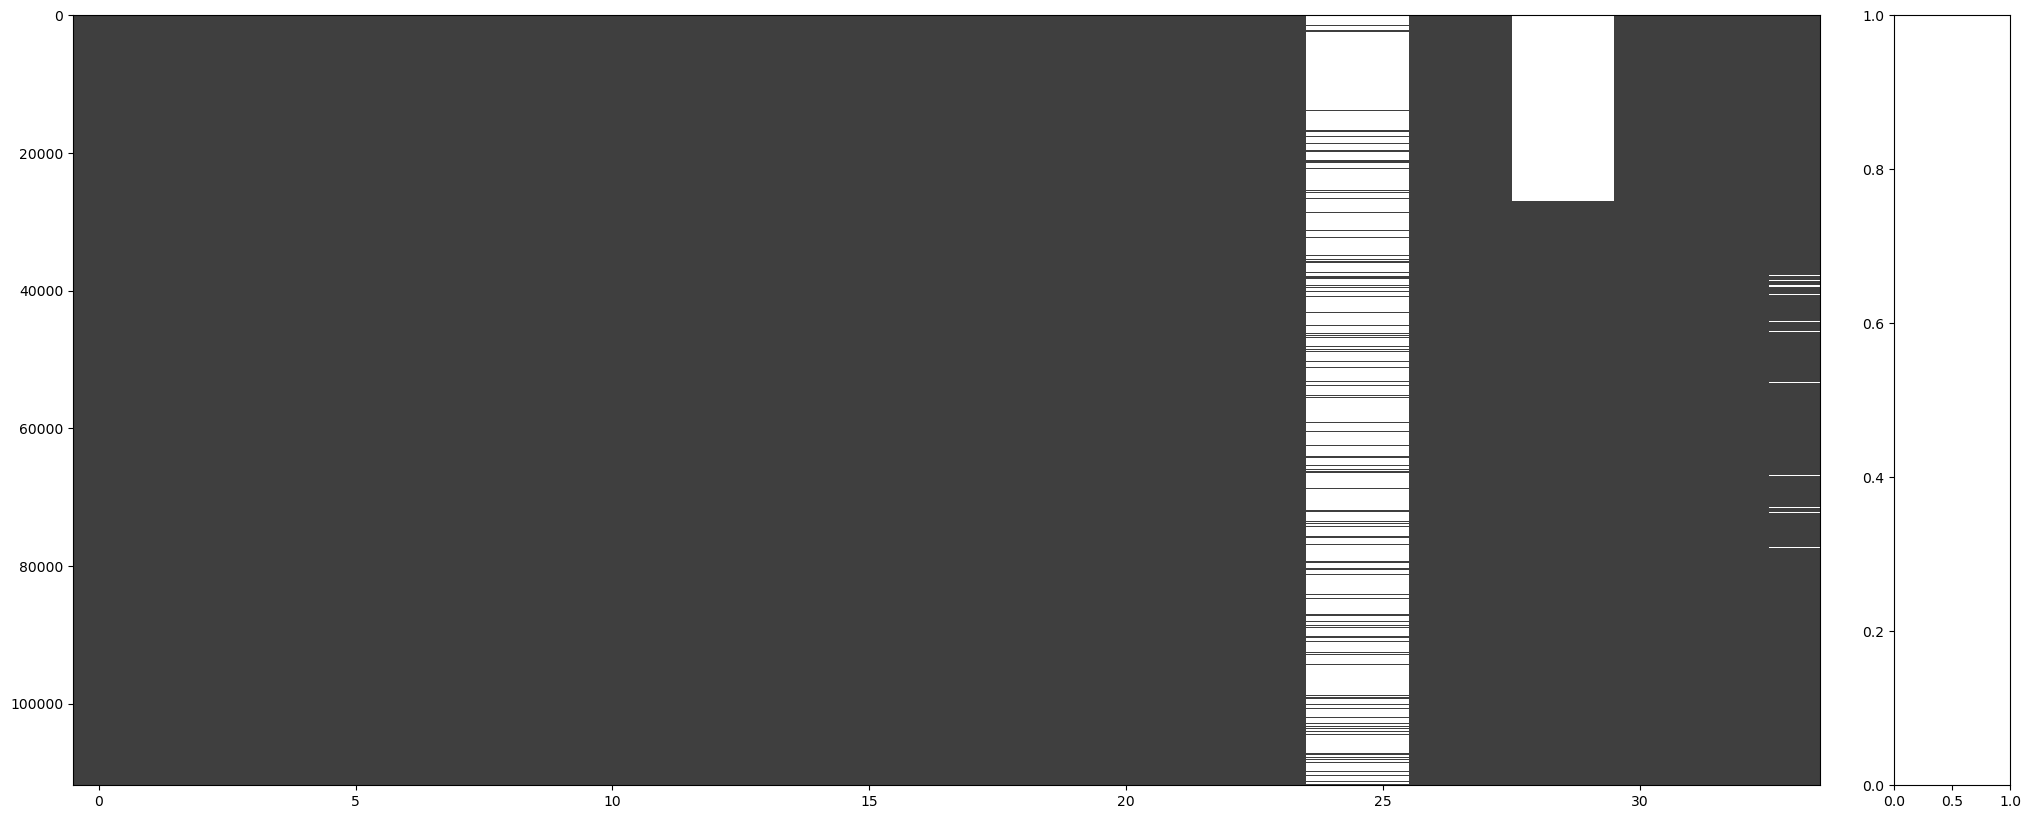

In [34]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
#mn.matrix(df.sort_values(by=["Cabin","Age"]))
#plt.title("Sorted",fontsize=22)
plt.show()

In [4]:
# 1. Remove attributes that arent useful for us
for col in ['WSF5','TMIN','TMAX', 'SNOW', 'SNWD', 'response_type', 'response_time']:
    if col in df:
        del df[col]
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  JUNCTIONTYPE          111882 non-null  object 
 13  INATTENTIONIND        111882 non-null  bool   
 14  UNDERINFL             111882 non-null  bool   
 15  

In [5]:
# Change boolean values to integars
df[['UNDERINFL', 'SPEEDING']] = df[['UNDERINFL', 'SPEEDING']].astype(int)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111882 entries, 0 to 111881
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            111882 non-null  int64  
 1   longitude             111882 non-null  float64
 2   latitude              111882 non-null  float64
 3   SEVERITYCODE          111882 non-null  int64  
 4   COLLISIONTYPE         111882 non-null  object 
 5   PERSONCOUNT           111882 non-null  int64  
 6   PEDCOUNT              111882 non-null  int64  
 7   PEDCYLCOUNT           111882 non-null  int64  
 8   VEHCOUNT              111882 non-null  int64  
 9   INJURIES              111882 non-null  int64  
 10  SERIOUSINJURIES       111882 non-null  int64  
 11  FATALITIES            111882 non-null  int64  
 12  JUNCTIONTYPE          111882 non-null  object 
 13  INATTENTIONIND        111882 non-null  bool   
 14  UNDERINFL             111882 non-null  int64  
 15  

,Unnamed: 0,longitude,latitude,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,...,LIGHTCOND,SPEEDING,HITPARKEDCAR,SPDCASENO,DATE,TIME,intersection_related,AWND,PRCP,TAVG
0,1,-122.324322,47.613755,0,Parked Car,2,0,0,2,0,...,1,0,False,05 012860,1/10/05,2.483333,False,9.4,0.0,33.0
1,2,-122.321556,47.571558,0,Rear Ended,3,0,0,3,0,...,1,0,False,05 13026,1/10/05,7.000000,False,9.4,0.0,33.0
2,3,-122.344164,47.555769,1,Head On,2,0,0,2,1,...,3,0,False,05-013056,1/10/05,7.900000,True,9.4,0.0,33.0
3,4,-122.309400,47.608484,1,Rear Ended,2,0,0,2,1,...,3,0,False,5013228,1/10/05,10.633333,True,9.4,0.0,33.0
4,5,-122.319746,47.674521,0,Left Turn,2,0,0,2,0,...,3,0,False,50013235,1/10/05,10.683333,True,9.4,0.0,33.0


# Data Visualization

Describe anything meaningful or potentially useful you discover from these visualizations. 

Visualize at least five plots, at least one categorical. 


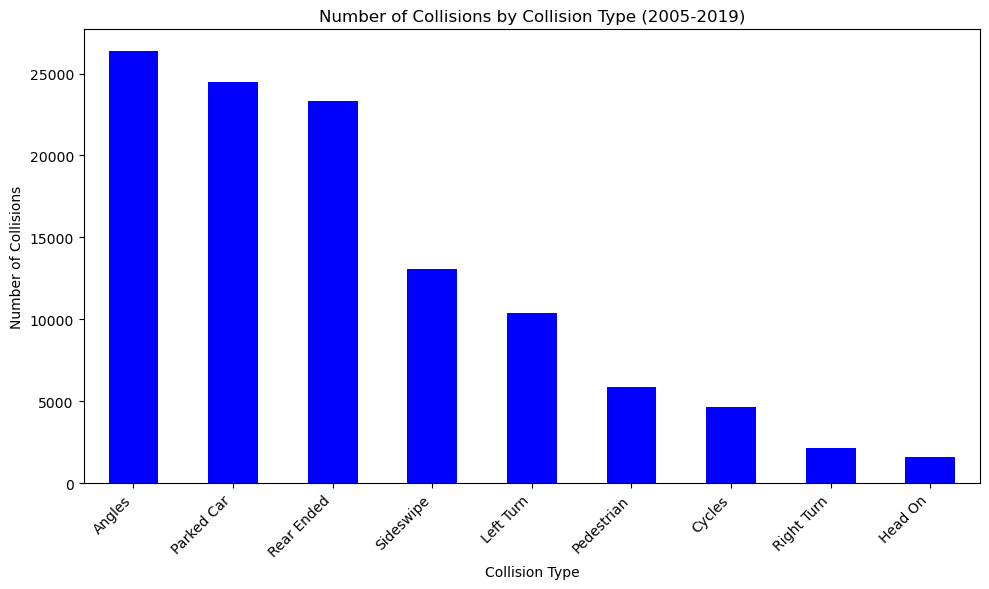

In [7]:
import matplotlib.pyplot as plt


# Count the occurrences of each collision type
collision_type_counts = df['COLLISIONTYPE'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
collision_type_counts.plot(kind='bar', color='blue')
plt.title('Number of Collisions by Collision Type (2005-2019)')
plt.xlabel('Collision Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 

# Show the plot
plt.show()


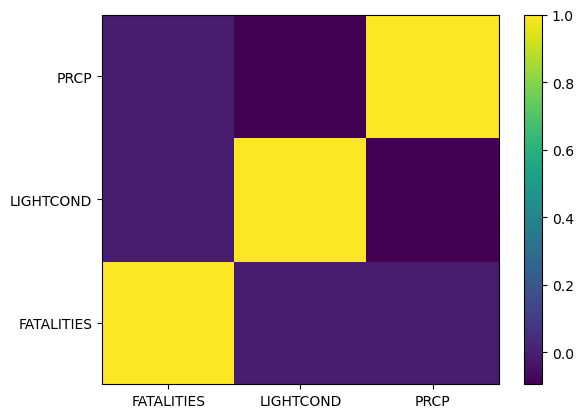

In [8]:
# plot the correlation matrix 
vars_to_use = ['FATALITIES', 'LIGHTCOND', 'PRCP'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

# closer to yellow (Closer to 1) means two variables are stronly positively correlated
# color closer to dark purple (closer to 0) mean weaker or no correlations
# Conlusion from this graph: there is a very slight correlation between Fatalities and Lightcondition and percipitation

In [9]:
import folium

fatal_accidents = df[df['FATALITIES'] > 0]

# Assuming 'latitude' and 'longitude' are the column names for latitude and longitude data
# and ensuring these columns don't contain missing values
fatal_accidents = fatal_accidents.dropna(subset=['latitude', 'longitude'])

# Create a map centered around an average location of the fatal accidents
map_center = [fatal_accidents['latitude'].mean(), fatal_accidents['longitude'].mean()]
fatal_accident_map = folium.Map(location=map_center, zoom_start=12)

# Add fatal accident locations to the map
for idx, row in fatal_accidents.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,  # Increased radius for better visibility
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(fatal_accident_map)

# Display the map
fatal_accident_map

## show line graph of all the latitude and longitudes m

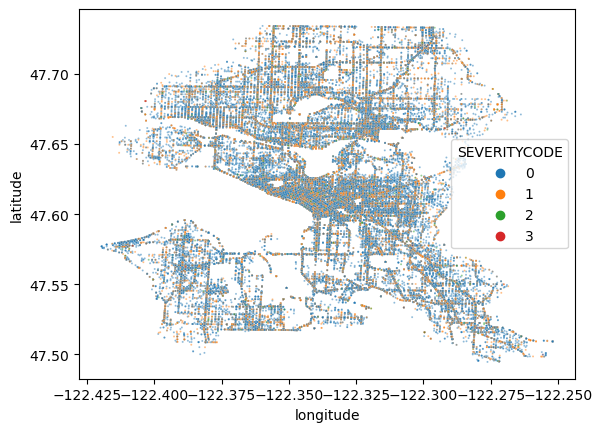

In [16]:
## Basic mapping
import polars as pl
import seaborn as sns
import statsmodels.formula.api as sm

data = pl.read_csv("/Users/juliarushton/Desktop/seattle_collision_data_2005_2019.csv",
                   infer_schema_length = 0, null_values = ["NA"])

data = data.with_columns(pl.col("longitude").cast(float),
                         pl.col("latitude").cast(float),
                         pl.col("SEVERITYCODE").cast(str))

sns.scatterplot(data.to_pandas(), 
               x = "longitude",
               y = "latitude",
               hue = "SEVERITYCODE",
               alpha = 0.5,
               s = 2)

plt.show()

## show line graph of all the latitude and longitudes m 
##show the concentration of longititude and latitude 

In [ ]:
df['longitude_bin'] = pd.cut(df['longitude'], bins=20) 

# Counting the number of accidents in each bin
longitude_frequency = df['longitude_bin'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
longitude_frequency.plot(kind='bar')
plt.title('Frequency of Accidents by Binned Longitude')
plt.xlabel('Longitude')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


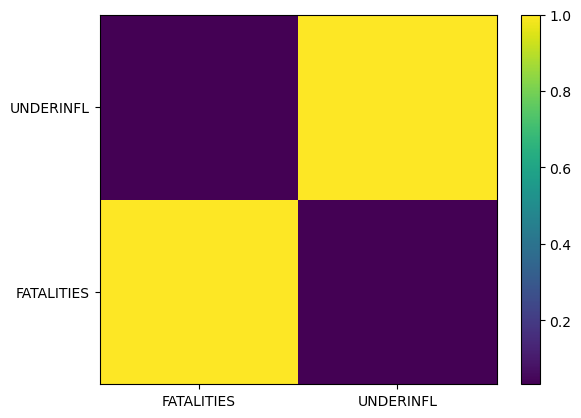

In [18]:
vars_to_use = ['FATALITIES', 'UNDERINFL'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

In [19]:
# lets make a pretty plot of the scatter matrix

#df[['UNDERINFL','TAVG','PRCP']] += np.random.rand(len(df),3)/2 
#sb.pairplot(df, hue="FATALITIES", height=2,
#           plot_kws=dict(s=20, alpha=0.15, linewidth=0))
#plt.show()

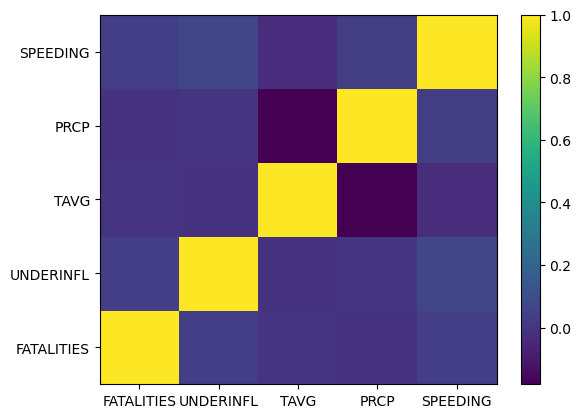

In [20]:
# plot the correlation matrix 
vars_to_use = ['FATALITIES', 'UNDERINFL', 'TAVG', 'PRCP', 'SPEEDING'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

# Question 1: What is the relationship between each of the road conditions and the level of severity of the collision?

FileNotFoundError: [Errno 2] No such file or directory: '/Users/juliarushton/Desktop/with_count.csv'

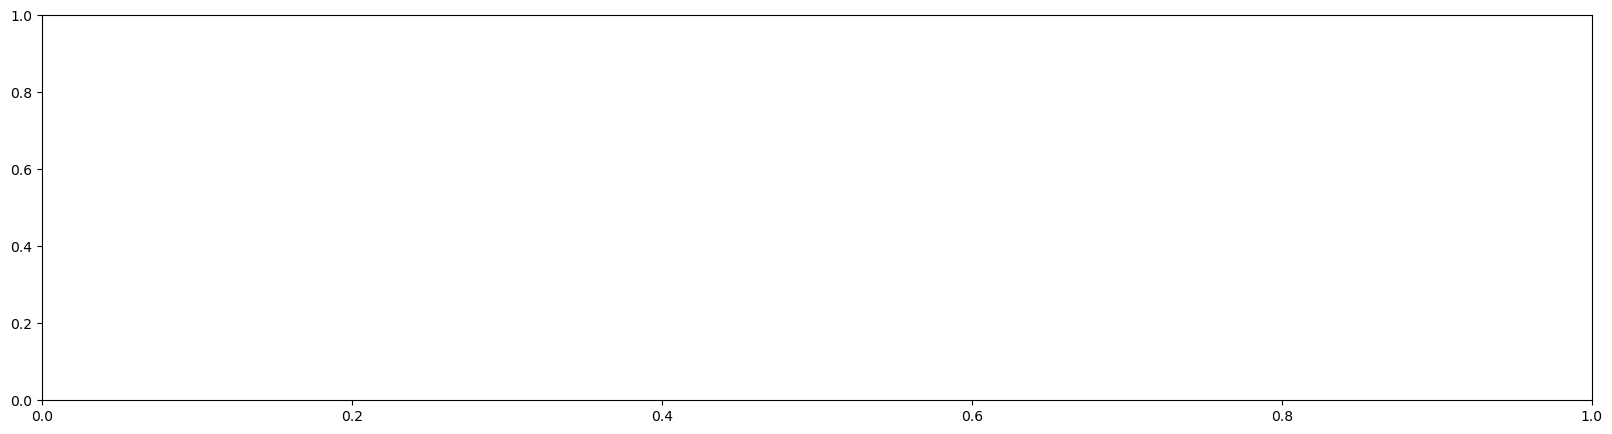

In [16]:
# sns boxplot
plt.subplots(figsize=(20, 5))

w_counts = pd.read_csv('/Users/juliarushton/Desktop/with_count.csv')

plt.subplot(1,3,1)
sns.boxplot(x="ROADCOND", y="counts", hue="SEVERITYCODE", data=w_counts)
plt.title('Boxplot Example')

#plt.subplot(1,3,2)
#sns.violinplot(x="Sex", y="Age", hue="Survived", data=df)
#plt.title('Violin Example')

#plt.subplot(1,3,3)
#sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df, s=3) # s controls marker size (like bins or bw)
#plt.title('Swarm Example')
plt.xticks(rotation=45)
plt.show()

# Question 2: What is the relationship between the weather conditions and the level of severity of the collision?

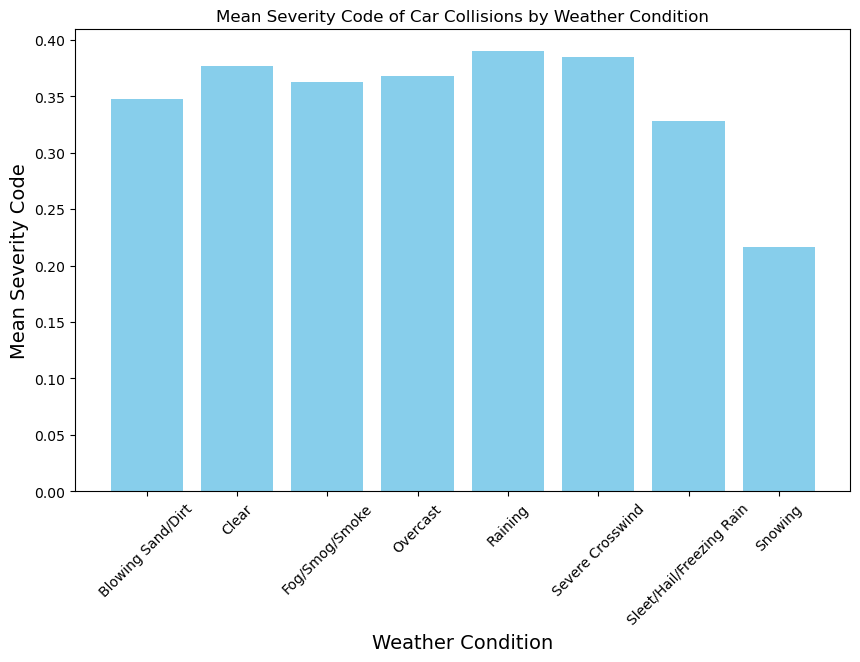

In [17]:
# Group by "WEATHER" and calculate the mean severity code
severity_by_weather = df.groupby('WEATHER')['SEVERITYCODE'].mean().reset_index()

# Plot the correlation between weather and severity
plt.figure(figsize=(10, 6))
plt.bar(severity_by_weather['WEATHER'], severity_by_weather['SEVERITYCODE'], color='skyblue')
plt.xlabel('Weather Condition', fontsize = 14)
plt.ylabel('Mean Severity Code', fontsize = 14)
plt.title('Mean Severity Code of Car Collisions by Weather Condition')
plt.xticks(rotation=45)
plt.show()

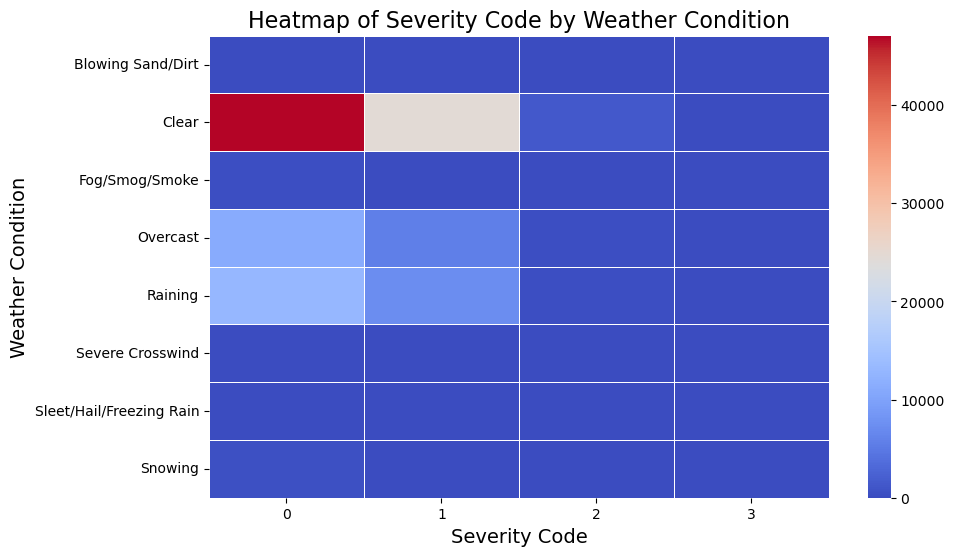

In [19]:
# Pivot the DataFrame to create a matrix of 'WEATHER' vs 'SEVERITYCODE'
heatmap_data = df[['WEATHER', 'SEVERITYCODE']].pivot_table(index='WEATHER', columns='SEVERITYCODE', aggfunc=len, fill_value=0)

# Create the heatmap without annotations
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=.5)
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.title('Heatmap of Severity Code by Weather Condition', fontsize=16)
plt.show()

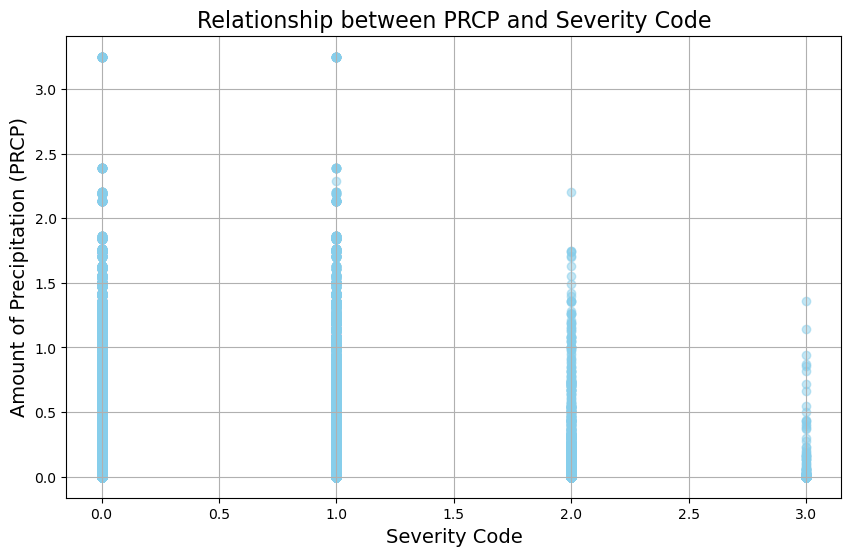

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['SEVERITYCODE'], df['PRCP'], color='skyblue', alpha=0.5)
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Amount of Precipitation (PRCP)', fontsize=14)
plt.title('Relationship between PRCP and Severity Code', fontsize=16)
plt.grid(True)
plt.show()


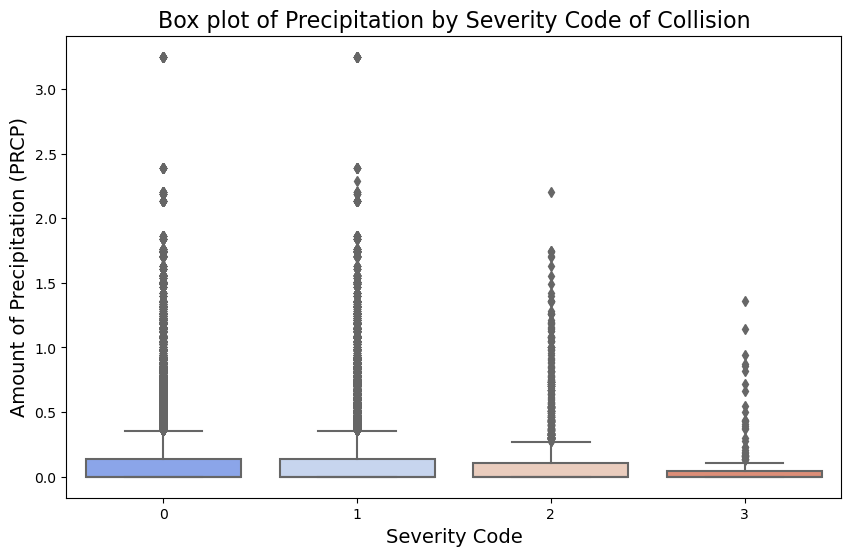

In [21]:
# Create box plots for each severity code
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEVERITYCODE', y='PRCP', data=df, palette='coolwarm')
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Amount of Precipitation (PRCP)', fontsize=14)
plt.title('Box plot of Precipitation by Severity Code of Collision', fontsize=16)
plt.show()

In [37]:
# Convert 'SPEEDING' and 'UNDERINFL' columns to string type
#df['SPEEDING', 'UNDERINFL'] = df['SPEEDING', 'UNDERINFL'].astype(str)

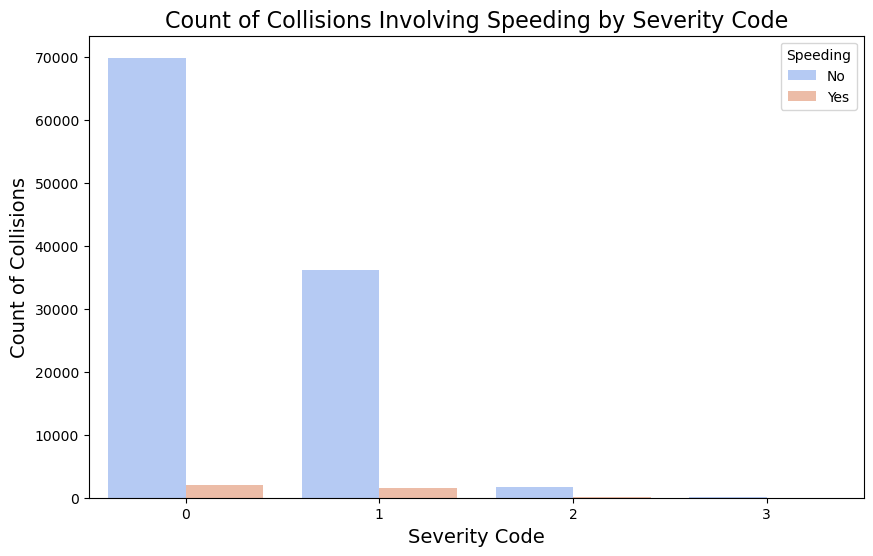

In [39]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='SEVERITYCODE', hue='SPEEDING', data=df, palette='coolwarm')
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count of Collisions', fontsize=14)
plt.title('Count of Collisions Involving Speeding by Severity Code', fontsize=16)
plt.legend(title='Speeding', labels=['No', 'Yes'])
plt.show()

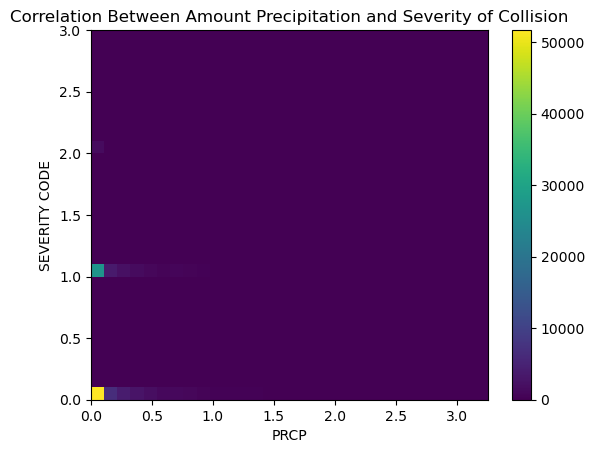

In [40]:
plt.hist2d(x=df.PRCP, y=df.SEVERITYCODE, bins=30)
plt.colorbar()
plt.title('Correlation Between Amount Precipitation and Severity of Collision', fontsize=12)
plt.xlabel("PRCP")
plt.ylabel("SEVERITY CODE")
plt.show()

# Question 3: What is the correlation between speeding, driving under the influence and inattention while driving and the severity level of the collision?

In [41]:
# Group by 'SEVERITYCODE' and count the number of 'True' and 'False' values in 'UNDERINFL'
count_by_severity = df.groupby('SEVERITYCODE')['UNDERINFL'].value_counts().unstack().fillna(0)

# Print the counts for each severity code
print("Under the influence counts:")
for severity_code, counts in count_by_severity.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[True]}, False: {counts[False]}")
    print()

# Group by 'SEVERITYCODE' and count the number of 'True' and 'False' values in 'SPEEDING'
count_by_severity_speed = df.groupby('SEVERITYCODE')['SPEEDING'].value_counts().unstack().fillna(0)

# Print the counts for each severity code
print("Speeding counts:")
for severity_code, counts in count_by_severity_speed.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[1]}, False: {counts[0]}")
    print()

# Group by 'SEVERITYCODE' and count the number of 'True' and 'False' values in 'INATTENTIONIND'
count_by_severity_inatten = df.groupby('SEVERITYCODE')['INATTENTIONIND'].value_counts().unstack().fillna(0)

# Print the counts for each severity code
print("Inattentive driving counts:")
for severity_code, counts in count_by_severity_inatten.iterrows():
    print(f"  SEVERITYCODE: {severity_code}")
    print(f"  True: {counts[True]}, False: {counts[False]}")
    print()

Under the influence counts:
  SEVERITYCODE: 0
  True: 3078, False: 68901

  SEVERITYCODE: 1
  True: 2112, False: 35692

  SEVERITYCODE: 2
  True: 240, False: 1669

  SEVERITYCODE: 3
  True: 44, False: 146

Speeding counts:
  SEVERITYCODE: 0
  True: 2092, False: 69887

  SEVERITYCODE: 1
  True: 1623, False: 36181

  SEVERITYCODE: 2
  True: 151, False: 1758

  SEVERITYCODE: 3
  True: 33, False: 157

Inattentive driving counts:
  SEVERITYCODE: 0
  True: 13851, False: 58128

  SEVERITYCODE: 1
  True: 8035, False: 29769

  SEVERITYCODE: 2
  True: 258, False: 1651

  SEVERITYCODE: 3
  True: 13, False: 177



<Figure size 1000x600 with 0 Axes>

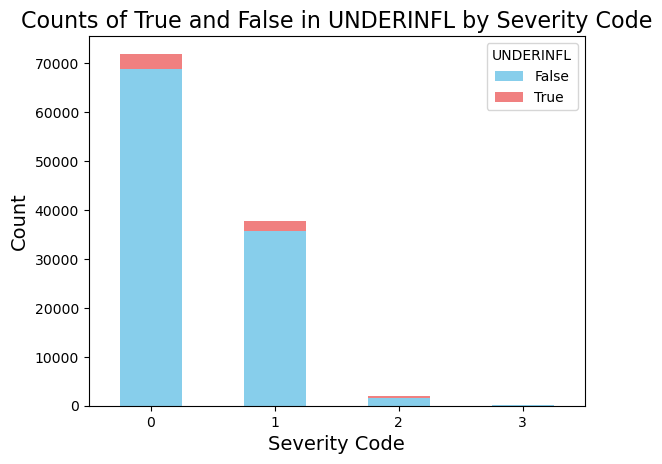

<Figure size 1000x600 with 0 Axes>

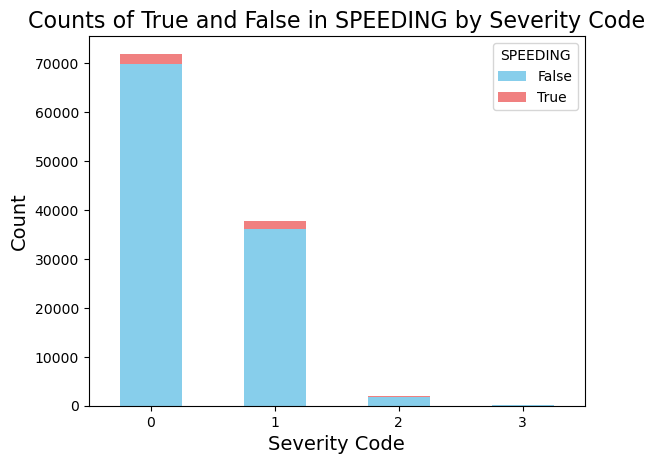

<Figure size 1000x600 with 0 Axes>

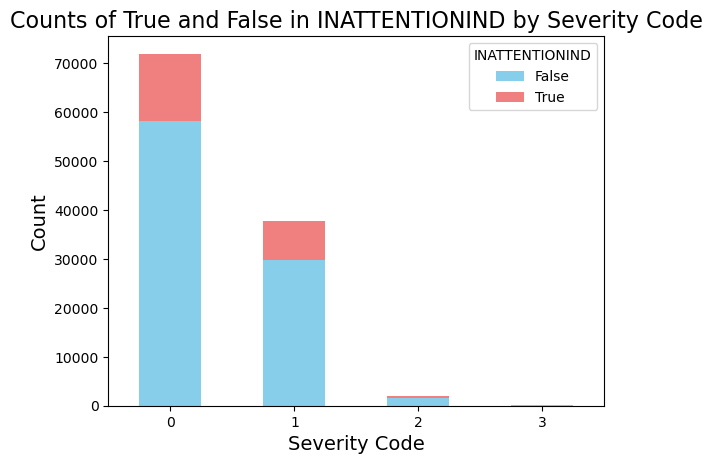

In [42]:
import matplotlib.pyplot as plt

# Plot the counts for each severity code
plt.figure(figsize=(10, 6))
count_by_severity.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in UNDERINFL by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='UNDERINFL')
plt.show()


# Plot the counts for each severity code
plt.figure(figsize=(10, 6))
count_by_severity_speed.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in SPEEDING by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='SPEEDING')
plt.show()



# Plot the counts for each severity code
plt.figure(figsize=(10, 6))
count_by_severity_inatten.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.xlabel('Severity Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of True and False in INATTENTIONIND by Severity Code', fontsize=16)
plt.xticks(rotation=0)
plt.legend(['False', 'True'], title='INATTENTIONIND')
plt.show()


<Figure size 1000x600 with 0 Axes>

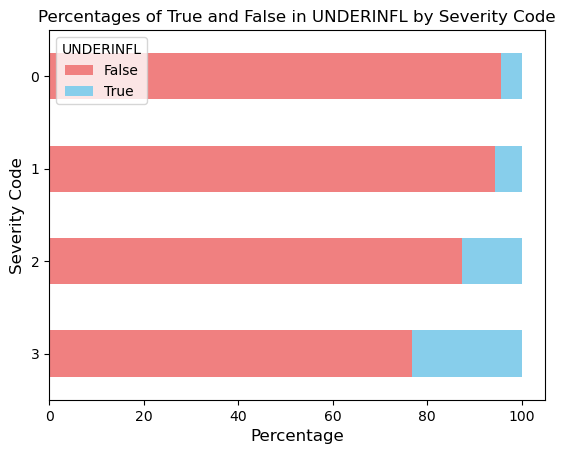

<Figure size 1000x600 with 0 Axes>

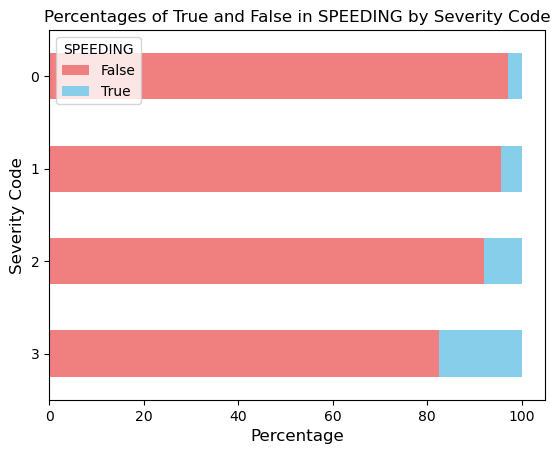

<Figure size 1000x600 with 0 Axes>

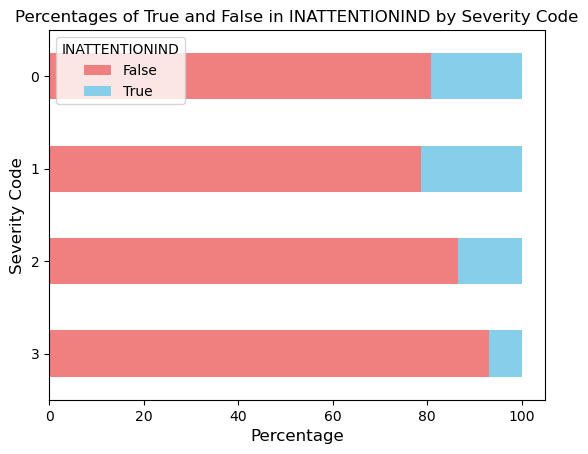

In [43]:
import matplotlib.pyplot as plt

# Calculate the percentages for each severity code
percent_by_severity = count_by_severity.div(count_by_severity.sum(axis=1), axis=0) * 100

# Plot the percentages for each severity code
plt.figure(figsize=(10, 6))
percent_by_severity.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in UNDERINFL by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='UNDERINFL')
plt.gca().invert_yaxis()  # Invert y-axis to have higher severity codes at the top
plt.show()


# Calculate the percentages for each severity code
percent_by_severity_speed = count_by_severity_speed.div(count_by_severity_speed.sum(axis=1), axis=0) * 100

# Plot the percentages for each severity code
plt.figure(figsize=(10, 6))
percent_by_severity_speed.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in SPEEDING by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='SPEEDING')
plt.gca().invert_yaxis()  # Invert y-axis to have higher severity codes at the top
plt.show()

# Calculate the percentages for each severity code
percent_by_severity_inatten = count_by_severity_inatten.div(count_by_severity_speed.sum(axis=1), axis=0) * 100

# Plot the percentages for each severity code
plt.figure(figsize=(10, 6))
percent_by_severity_inatten.plot(kind='barh', stacked=True, color=['lightcoral', 'skyblue'])
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Severity Code', fontsize=12)
plt.title('Percentages of True and False in INATTENTIONIND by Severity Code', fontsize=12)
plt.legend(['False', 'True'], title='INATTENTIONIND')
plt.gca().invert_yaxis()  # Invert y-axis to have higher severity codes at the top
plt.show()
